In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [3]:
geo = pd.read_excel('data/geo.xlsx')

In [4]:
df = pd.read_excel('data/students.xlsx')
df.head(2)

,GIA,Код ОО,Краткое наименование ОО,Вид ОО,Тип ОО,Выпускник,Код предмета,Предмет,Вариант,Часть В,...,17_Часть В,18_Часть В,Часть С,1_Часть С,2_Часть С,Часть D,Первичный балл,% Оценка,Оцека по 100,Оцека по 5
0,1,201033,МБОУ СОШ № 3 с. Александров-Гай Александрово-Г...,Средняя общеобразовательная школа,Общеобразовательное учреждение/организация,Выпускник общеобразовательной организации теку...,5,Информатика,75657,-++++-+++++++++---,...,-,-,0(2)2(2),0,2,NaN,15,68,0,4
1,1,203063,МОУ - СОШ № 9 г. Аткарска Саратовской области,Средняя общеобразовательная школа,Общеобразовательное учреждение/организация,Выпускник общеобразовательной организации теку...,5,Информатика,73202,++++++++++++++++++,...,+,+,2(2)2(2),2,2,NaN,22,100,0,5


In [5]:
df.rename(columns={'Оцека по 5': 'Оценка по 5'}, inplace=True)

**1. Общая статистика (количество, минимальный, максимальный, среднее, медиана, мода, среднеквадратическое отклонение).**

In [6]:
df.describe()

,GIA,Код ОО,Код предмета,Вариант,1_Часть С,2_Часть С,Часть D,Первичный балл,% Оценка,Оцека по 100,Оценка по 5
count,5986.0,5986.000000,5986.0,5986.000000,5986.000000,5986.000000,0.0,5986.000000,5986.000000,5986.0,5986.000000
mean,1.0,231360.996993,5.0,75712.741898,0.569328,0.724357,NaN,13.290511,59.949215,0.0,3.847310
std,0.0,16145.371646,0.0,2523.973802,0.817900,0.943977,NaN,5.408305,24.587472,0.0,0.859216
min,1.0,201013.000000,5.0,70683.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.0,2.000000
25%,1.0,216028.250000,5.0,74018.000000,0.000000,0.000000,NaN,9.000000,40.000000,0.0,3.000000
50%,1.0,238073.000000,5.0,74810.000000,0.000000,0.000000,NaN,14.000000,63.000000,0.0,4.000000
75%,1.0,245083.000000,5.0,76449.000000,1.000000,2.000000,NaN,18.000000,81.000000,0.0,5.000000
max,1.0,253023.000000,5.0,83584.000000,2.000000,2.000000,NaN,22.000000,100.000000,0.0,5.000000


In [7]:
df.median(numeric_only=True)

GIA                    1.0
Код ОО            238073.0
Код предмета           5.0
Вариант            74810.0
1_Часть С              0.0
2_Часть С              0.0
Часть D                NaN
Первичный балл        14.0
% Оценка              63.0
Оцека по 100           0.0
Оценка по 5            4.0
dtype: float64

In [8]:
df.mode()

,GIA,Код ОО,Краткое наименование ОО,Вид ОО,Тип ОО,Выпускник,Код предмета,Предмет,Вариант,Часть В,...,17_Часть В,18_Часть В,Часть С,1_Часть С,2_Часть С,Часть D,Первичный балл,% Оценка,Оцека по 100,Оценка по 5
0,1,241036,"МАОУ ""Физико-технический лицей № 1""",Средняя общеобразовательная школа,Общеобразовательное учреждение/организация,Выпускник общеобразовательной организации теку...,5,Информатика,73202,++++++++++++++++++,...,+,+,0(2)0(2),0,0,NaN,13,59,0,4


**2. Статистика количества сдававших и оценок по видам школ (СОШ, гимназия, лицей и т.д.), гистограмма.**

In [9]:
schools_marks_by_type_school = df.groupby(['Оценка по 5', 'Вид ОО']).count()
schools_marks_by_type_school.head(2)

GIA  Код ОО  \
Оценка по 5 Вид ОО                                                      
2           Вечерняя (сменная) общеобразовательная школа    8       8   
            Гимназия                                        1       1   

                                                          Краткое наименование ОО  \
Оценка по 5 Вид ОО                                                                  
2           Вечерняя (сменная) общеобразовательная школа                        8   
            Гимназия                                                            1   

                                                          Тип ОО  Выпускник  \
Оценка по 5 Вид ОО                                                            
2           Вечерняя (сменная) общеобразовательная школа       8          8   
            Гимназия                                           1          1   

                                                          Код предмета  \
Оценка по 5 Вид ОО                                                       
2           Вечерняя (сменная) общеобразовательная школа             8   
            Гимназия                                                 1   

                                                          Предмет  Вариант  \
Оценка по 5 Вид ОО                                                           
2           Вечерняя (сменная) общеобразовательная школа        8        8   
            Гимназия                                            1        1   

                                                          Часть В  1_Часть В  \
Оценка по 5 Вид ОО                                                             
2           Вечерняя (сменная) общеобразовательная школа        8          8   
            Гимназия                                            1          1   

                                                          ...  16_Часть В  \
Оценка по 5 Вид ОО                                        ...               
2           Вечерняя (сменная) общеобразовательная школа  ...           8   
            Гимназия                                      ...           1   

                                                          17_Часть В  \
Оценка по 5 Вид ОО                                                     
2           Вечерняя (сменная) общеобразовательная школа           8   
            Гимназия                                               1   

                                                          18_Часть В  Часть С  \
Оценка по 5 Вид ОО                                                              
2           Вечерняя (сменная) общеобразовательная школа           8        8   
            Гимназия                                               1        1   

                                                          1_Часть С  \
Оценка по 5 Вид ОО                                                    
2           Вечерняя (сменная) общеобразовательная школа          8   
            Гимназия                                              1   

                                                          2_Часть С  Часть D  \
Оценка по 5 Вид ОО                                                             
2           Вечерняя (сменная) общеобразовательная школа          8        0   
            Гимназия                                              1        0   

                                                          Первичный балл  \
Оценка по 5 Вид ОО                                                         
2           Вечерняя (сменная) общеобразовательная школа               8   
            Гимназия                                                   1   

                                                          % Оценка  \
Оценка по 5 Вид ОО                                                   
2           Вечерняя (сменная) общеобразовательная школа         8   
            Гимназия                                             1   

                                                          Оце

<Axes: xlabel='Оценка по 5,Вид ОО'>

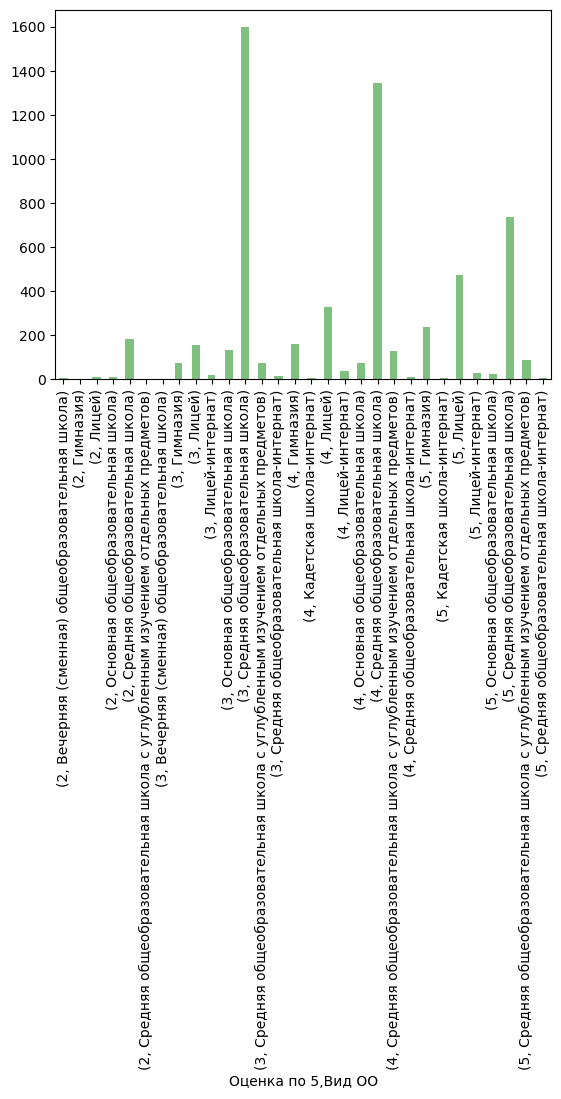

In [10]:
schools_marks_by_type_school.plot(kind='bar', color='green', legend=False, alpha=0.5)

In [11]:
schools_all_marks_by_type_school = df.groupby('Вид ОО').count()

<Axes: xlabel='Вид ОО'>

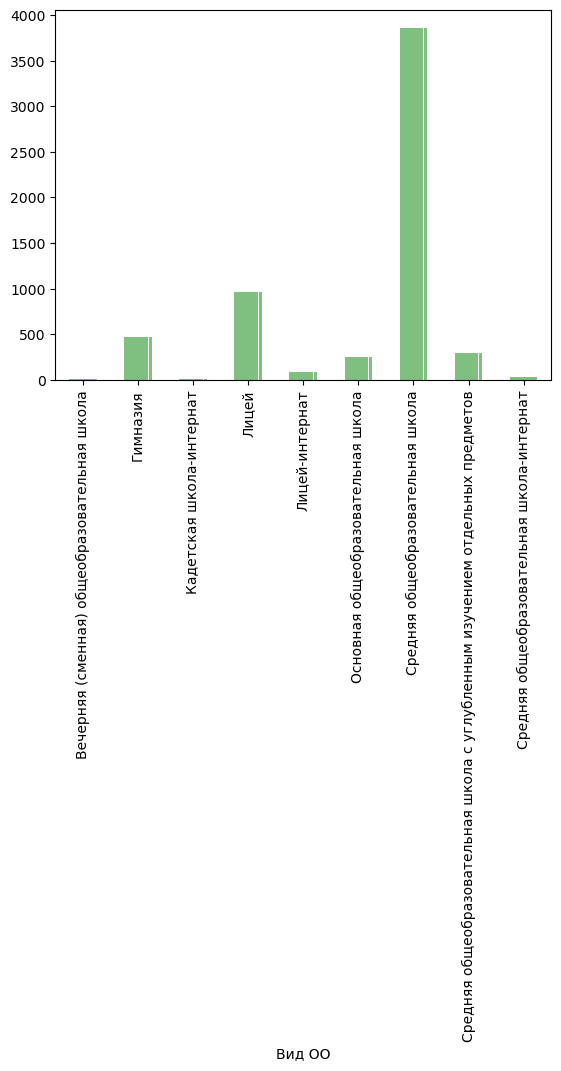

In [12]:
schools_all_marks_by_type_school.plot(kind='bar', color='green', legend=False, alpha=0.5)

**3. Статистика количества сдававших и оценок по районам, гистограмма.**

In [13]:
df['Код района'] = df['Код ОО'].astype(str).str[:3]
df['Код района'] = df['Код района'].astype('int64')
df.head(2)

,GIA,Код ОО,Краткое наименование ОО,Вид ОО,Тип ОО,Выпускник,Код предмета,Предмет,Вариант,Часть В,...,18_Часть В,Часть С,1_Часть С,2_Часть С,Часть D,Первичный балл,% Оценка,Оцека по 100,Оценка по 5,Код района
0,1,201033,МБОУ СОШ № 3 с. Александров-Гай Александрово-Г...,Средняя общеобразовательная школа,Общеобразовательное учреждение/организация,Выпускник общеобразовательной организации теку...,5,Информатика,75657,-++++-+++++++++---,...,-,0(2)2(2),0,2,NaN,15,68,0,4,201
1,1,203063,МОУ - СОШ № 9 г. Аткарска Саратовской области,Средняя общеобразовательная школа,Общеобразовательное учреждение/организация,Выпускник общеобразовательной организации теку...,5,Информатика,73202,++++++++++++++++++,...,+,2(2)2(2),2,2,NaN,22,100,0,5,203


In [14]:
merged_df = pd.merge(df, geo, on='Код района', how='inner')
merged_df.head(2)

,GIA,Код ОО,Краткое наименование ОО,Вид ОО,Тип ОО,Выпускник,Код предмета,Предмет,Вариант,Часть В,...,2_Часть С,Часть D,Первичный балл,% Оценка,Оцека по 100,Оценка по 5,Код района,Район,Расстояние до Саратова,Численность населения
0,1,201033,МБОУ СОШ № 3 с. Александров-Гай Александрово-Г...,Средняя общеобразовательная школа,Общеобразовательное учреждение/организация,Выпускник общеобразовательной организации теку...,5,Информатика,75657,-++++-+++++++++---,...,2,NaN,15,68,0,4,201,Алгайский,265,14765
1,1,201013,МБОУ СОШ № 1 с. Александров-Гай Александрово-Г...,Средняя общеобразовательная школа,Общеобразовательное учреждение/организация,Выпускник общеобразовательной организации теку...,5,Информатика,74018,++--++++++---++---,...,0,NaN,10,45,0,3,201,Алгайский,265,14765


<Axes: xlabel='Оценка по 5,Район'>

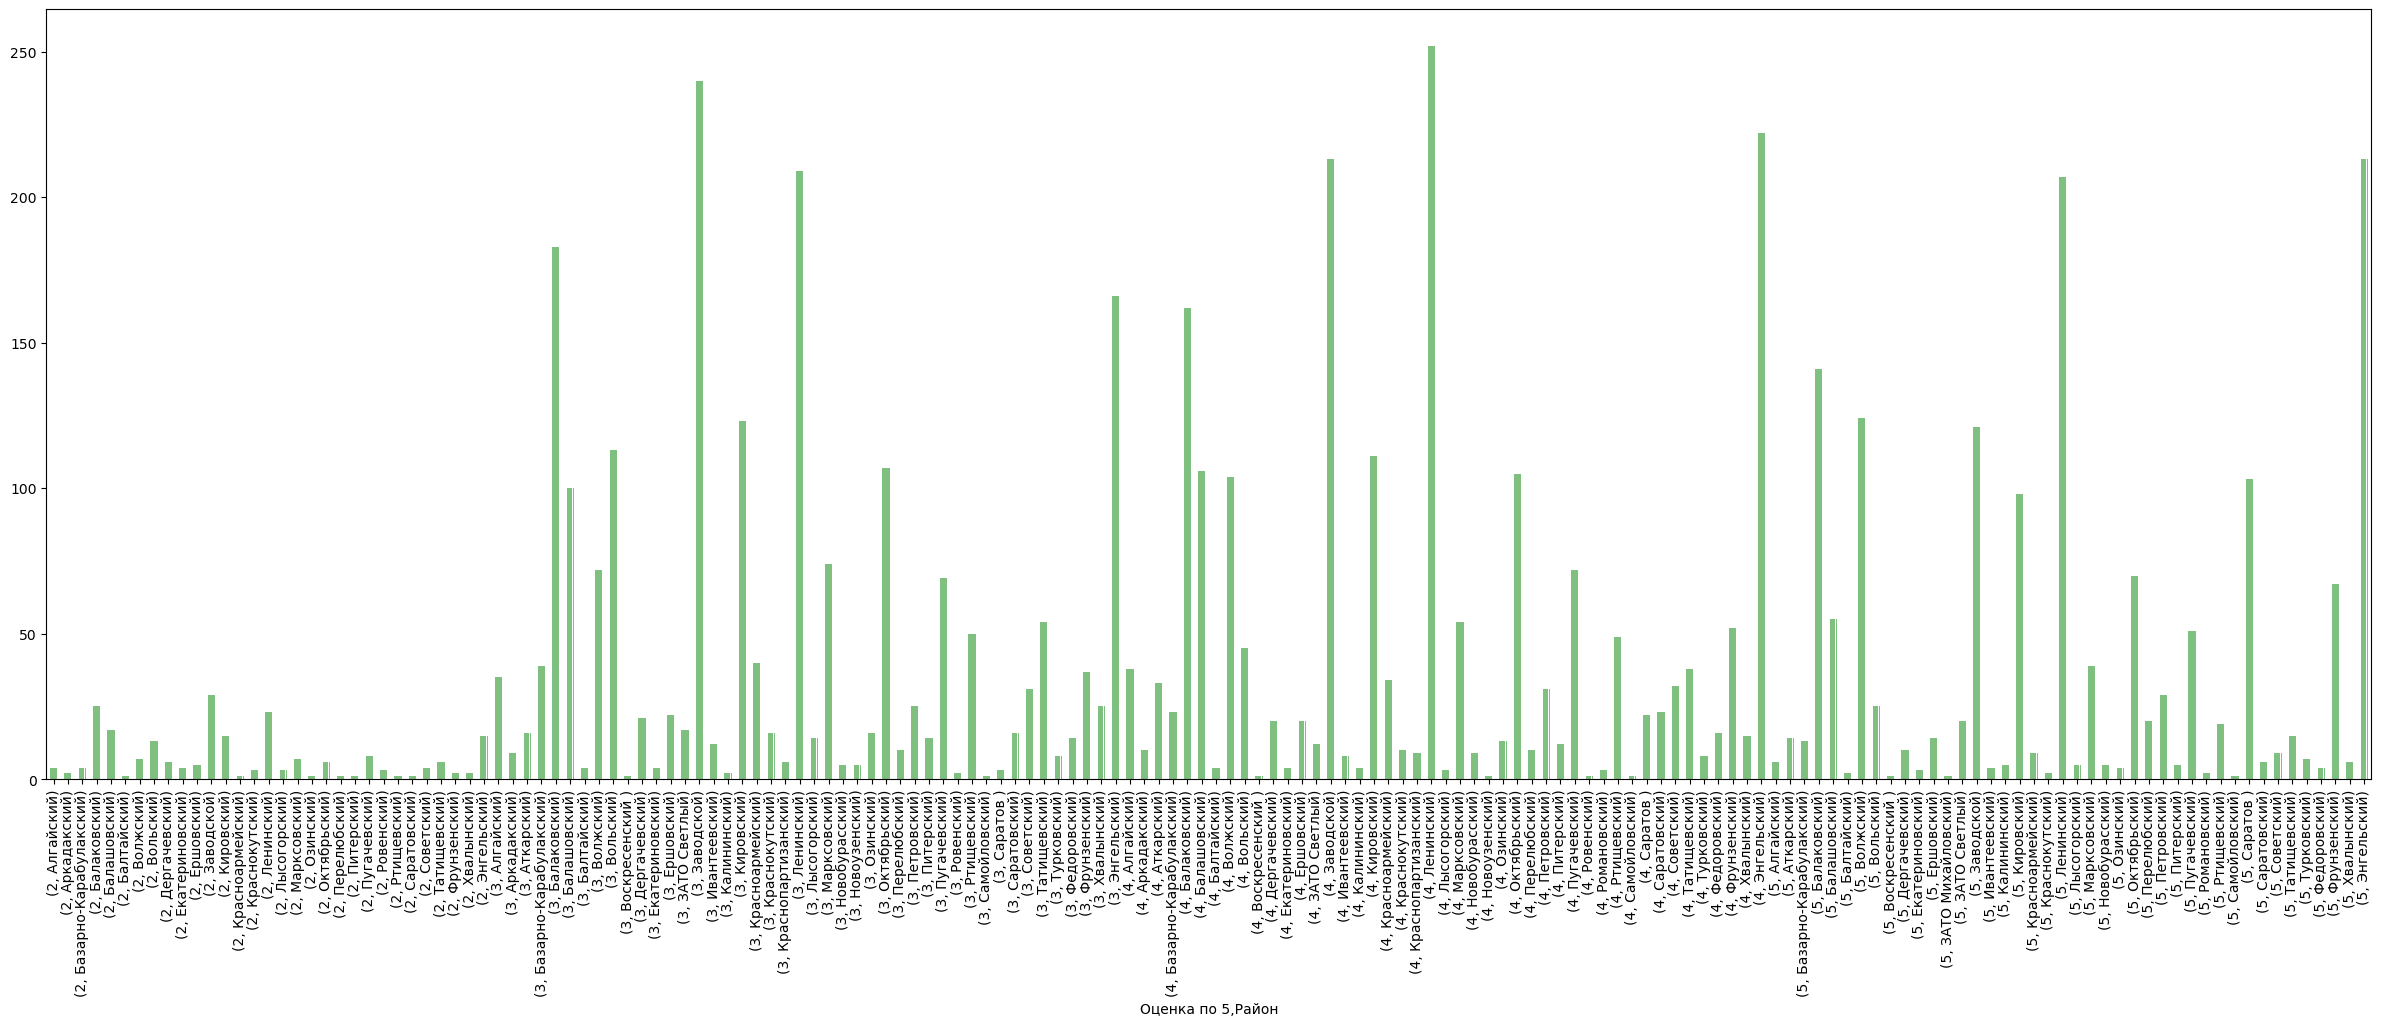

In [15]:
schools_marks_by_area = merged_df.groupby(['Оценка по 5', 'Район']).count()
schools_marks_by_area.plot(kind='bar', color='green', legend=False, alpha=0.5, figsize=(30, 10))

<Axes: xlabel='Район'>

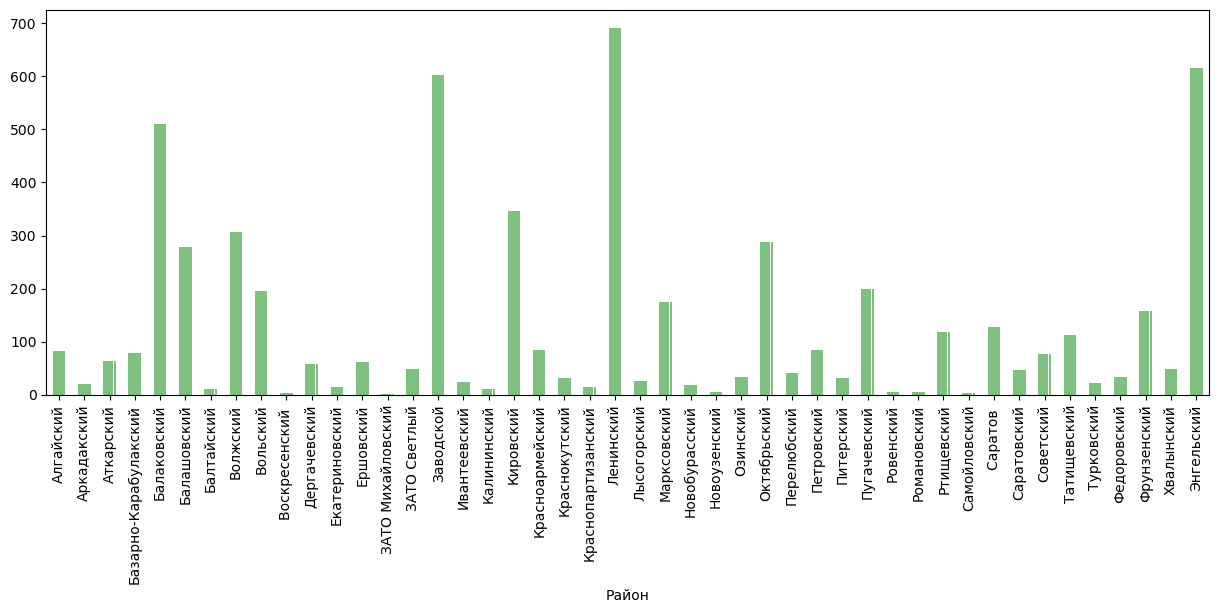

In [16]:
schools_all_marks_by_area = merged_df.groupby('Район').count()
schools_all_marks_by_area.plot(kind='bar', color='green', legend=False, alpha=0.5, figsize=(15, 5))

**4. 10 лучших школ (не учитывать школы, из которых участвовало менее 10 учеников).**

In [17]:
school_counts = df['Краткое наименование ОО'].value_counts()
school_counts_student_over_ten = school_counts[school_counts >= 10]
filtered_schools = df[df['Краткое наименование ОО'].isin(school_counts_student_over_ten.index)]
school_average_score = filtered_schools.groupby('Краткое наименование ОО')['Первичный балл'].mean()
top_ten_schools = school_average_score.nlargest(10)
top_ten_schools

Краткое наименование ОО
МАОУ "Физико-технический лицей № 1"    20.283019
МАОУ ЛМИ                               20.061224
МАОУ "Гимназия № 3"                    19.689655
МАОУ "Гимназия № 4"                    19.617021
МАОУ Гимназия № 1                      19.500000
МАОУ "МБЛ" г. Саратова                 19.160000
МАОУ "Лицей № 36" г.Саратова           19.104167
МБОУ "СОШ № 4"                         19.000000
МОУ "Лицей прикладных наук"            18.942308
МАОУ Лицей № 1                         18.923077
Name: Первичный балл, dtype: float64

**5. 10 худших школ.**

In [18]:
bottom_ten_schools = school_average_score.nsmallest(10)
bottom_ten_schools

Краткое наименование ОО
МОУ ВСОШ № 2 г. Балашова                                                           3.454545
МОУ СОШ № 1                                                                        6.500000
МАОУ СОШ № 15                                                                      6.857143
МОУ "СОШ № 38"                                                                     7.733333
МОУ "СОШ п. Учебный Ершовского района Саратовской области"                         7.772727
МОУ "СОШ № 22"                                                                     7.785714
МОУ "СОШ № 102"                                                                    7.843750
МБОУ "Средняя общеобразовательная школа №1 р.п. Лысые Горы Саратовской области>    7.857143
МОУ "СОШ № 57"                                                                     7.935484
МОУ "ООШ № 17"                                                                     8.000000
Name: Первичный балл, dtype: float64

**6. Проверка гипотезы: зависимость результатов от удалённости от областного центра.**

In [19]:
corr_value = merged_df['Первичный балл'].corr(merged_df['Расстояние до Саратова'])
print("Коэффициент корреляции Пирсона:", corr_value)

Коэффициент корреляции Пирсона: -0.11247570571062375


**7. Проверка гипотезы: зависимость результатов от размера населённого пункта, в котором расположено образовательное учреждение (по численности населения).**

In [21]:
corr_value2 = merged_df['Первичный балл'].corr(merged_df['Численность населения'])
print("Коэффициент корреляции:", corr_value2)

Коэффициент корреляции: 0.17449086634491393
